In [1]:
# Taken from https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#
#
# This problem has the following inputs:
# 1. Frequency, in Hertzs.
# 2. Angle of attack, in degrees.
# 3. Chord length, in meters.
# 4. Free-stream velocity, in meters per second.
# 5. Suction side displacement thickness, in meters.
# 
# The only output is:
# 6. Scaled sound pressure level, in decibels.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler

In [3]:
tf.__version__

'2.2.0'

In [4]:
data = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None, 
                   names = ['Frequency - hz', 'Angle of Attack- degree', 'Chord Length - m',
                            'Free-stream velocity - m/s', 'Suction side displacement - m',
                            'Scaled Sound Pressure Level - decibels'])

data.head()

,Frequency - hz,Angle of Attack- degree,Chord Length - m,Free-stream velocity - m/s,Suction side displacement - m,Scaled Sound Pressure Level - decibels
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
data.describe()

,Frequency - hz,Angle of Attack- degree,Chord Length - m,Free-stream velocity - m/s,Suction side displacement - m,Scaled Sound Pressure Level - decibels
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


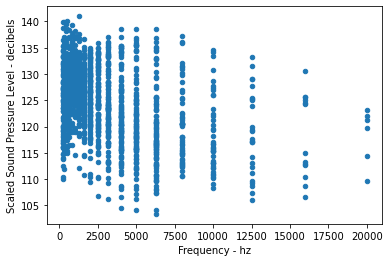

In [6]:
data.plot.scatter(x='Frequency - hz', y='Scaled Sound Pressure Level - decibels')

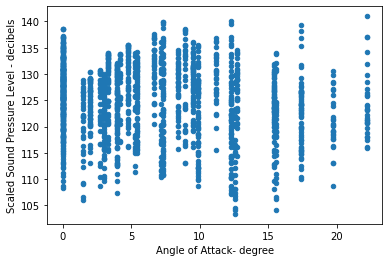

In [7]:
data.plot.scatter(x='Angle of Attack- degree', y='Scaled Sound Pressure Level - decibels')

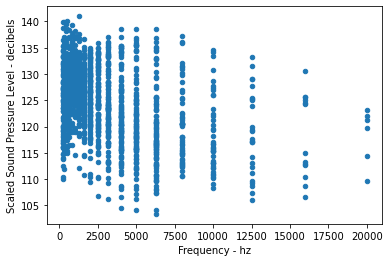

In [8]:
data.plot.scatter(x='Frequency - hz', y='Scaled Sound Pressure Level - decibels')

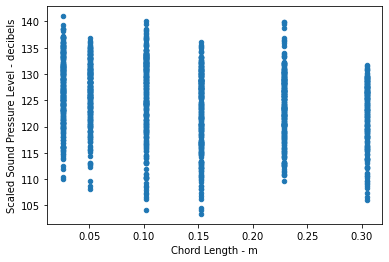

In [9]:
data.plot.scatter(x='Chord Length - m', y='Scaled Sound Pressure Level - decibels')

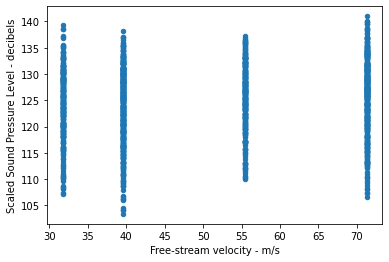

In [10]:
data.plot.scatter(x='Free-stream velocity - m/s', y='Scaled Sound Pressure Level - decibels')

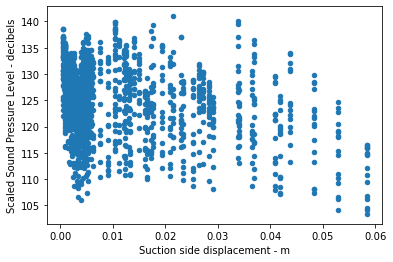

In [11]:
data.plot.scatter(x='Suction side displacement - m', y='Scaled Sound Pressure Level - decibels')

In [12]:
y = data['Scaled Sound Pressure Level - decibels']

X = data.drop('Scaled Sound Pressure Level - decibels', axis=1)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,test_size=0.2)

In [13]:
scaler = MinMaxScaler()

scaler.fit(X_train)

standardized_X_train = scaler.transform(X_train)

standardized_X_test = scaler.transform(X_test)

In [14]:
print(standardized_X_train.shape)
print(y_train.shape)

(1202, 5)
(1202,)


In [15]:
print(standardized_X_test.shape)
print(y_test.shape)


(301, 5)
(301,)


In [25]:
model = keras.Sequential()
model.add(layers.Dense(500, input_dim=5, activation= "relu"))
model.add(layers.Dense(100, activation= "relu"))
model.add(layers.Dense(50, activation= "relu"))
model.add(layers.Dense(1))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [26]:
model.fit(standardized_X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 15559.5029 - mean_squared_error: 15559.5029
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 15157.2178 - mean_squared_error: 15157.2178
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 14049.2412 - mean_squared_error: 14049.2412
Epoch 4/100
10/10 [==============================] - 0s 24ms/step - loss: 11417.6553 - mean_squared_error: 11417.6553
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 6629.6929 - mean_squared_error: 6629.6929
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 1889.8900 - mean_squared_error: 1889.8900
Epoch 7/100
10/10 [==============================] - 0s 22ms/step - loss: 1471.0170 - mean_squared_error: 1471.0170
Epoch 8/100
10/10 [==============================] - 0s 18ms/step - loss: 1055.5067 - mean_squared_error: 1055.5067
Epoch 9/100
10/10 [==============================] - 0s 19ms/ste

Epoch 73/100
10/10 [==============================] - 0s 20ms/step - loss: 21.0430 - mean_squared_error: 21.0430
Epoch 74/100
10/10 [==============================] - 0s 17ms/step - loss: 20.8860 - mean_squared_error: 20.8860
Epoch 75/100
10/10 [==============================] - 0s 16ms/step - loss: 20.8289 - mean_squared_error: 20.8289
Epoch 76/100
10/10 [==============================] - 0s 21ms/step - loss: 20.6905 - mean_squared_error: 20.6905
Epoch 77/100
10/10 [==============================] - 0s 19ms/step - loss: 20.7084 - mean_squared_error: 20.7084
Epoch 78/100
10/10 [==============================] - 0s 15ms/step - loss: 20.5518 - mean_squared_error: 20.5518
Epoch 79/100
10/10 [==============================] - 0s 14ms/step - loss: 20.4436 - mean_squared_error: 20.4436
Epoch 80/100
10/10 [==============================] - 0s 27ms/step - loss: 20.3857 - mean_squared_error: 20.3857
Epoch 81/100
10/10 [==============================] - 0s 19ms/step - loss: 20.2401 - mean_square

In [27]:
model.evaluate(standardized_X_test, y_test)

10/10 [==============================] - 0s 13ms/step - loss: 16.9512 - mean_squared_error: 16.9512


[16.951213836669922, 16.951213836669922]